# Import libraries

In [81]:
from numpy import load
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import random
from tqdm import tqdm_notebook as tqdm
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

# Load data

In [18]:
data = load("Soybean.npz")
X, y = data['arr_0'],data['arr_1']

In [19]:
print(X.shape)
print(y.shape)

(15336, 128, 128, 3)
(15336, 4)


In [20]:
X_shape = X.shape
y_shape = y.shape
X = X.reshape((X_shape[0], X_shape[1]*X_shape[2]*X_shape[3])).astype('float64')
X = X / 255.0
X_shape = X.shape
y_shape = y.shape
#y = y.reshape((y_shape[0],1))

In [21]:
print(X.shape)
print(y.shape)

(15336, 49152)
(15336, 4)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
#sigmoid and its derivative
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [24]:
#relu and its derivative
def relu(x):
    return np.maximum(x, 0)

def relu_deriv(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x


In [25]:
n = 0.001
layer_1 = 1024
layer_2 = 256
layer_3 = 32
classes = ["soil", "soybean", "grass", "broadleaf"]
classes_map = { 0:"soil", 1:"soybean", 2:"grass", 3:"broadleaf"}
n_classes = len(classes)

In [26]:
#Weights
w = [0,0,0,0]
w[0] = 2*np.random.random((X.shape[1],layer_1)) - 1 
w[1] = 2*np.random.random((layer_1, layer_2)) - 1
w[2] = 2*np.random.random((layer_2, layer_3)) - 1
w[3] = 2*np.random.random((layer_3, n_classes)) - 1

In [27]:
errors = []
#Train
for i in tqdm(range(50)):
    
    #Feed forward
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w[0]))
    layer2 = sigmoid(np.dot(layer1, w[1]))
    layer3 = sigmoid(np.dot(layer2, w[2]))
    layer4 = sigmoid(np.dot(layer3, w[3]))
    
    #Back propagation using gradient descent
    layer4_error = y_train - layer4
    layer4_delta = layer4_error * sigmoid_deriv(layer4)
    
    layer3_error = layer4_delta.dot(w[3].T)
    layer3_delta = layer3_error * sigmoid_deriv(layer3)
    
    layer2_error = layer3_delta.dot(w[2].T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w[1].T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w[3] += layer3.T.dot(layer4_delta) * n
    w[2] += layer2.T.dot(layer3_delta) * n
    w[1] += layer1.T.dot(layer2_delta) * n
    w[0] += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer3_error))
    if i % 1 == 0:
        print("Epoch: ",i," Error: ",error)
    errors.append(error)

Epoch:  0  Error:  0.11416018355861553


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch:  1  Error:  0.14998158885272195
Epoch:  2  Error:  0.12957351900392716
Epoch:  3  Error:  0.14606144190258122
Epoch:  4  Error:  0.12977775031296232
Epoch:  5  Error:  0.11865742394948743
Epoch:  6  Error:  0.1063459064173832
Epoch:  7  Error:  0.12414256956925274
Epoch:  8  Error:  0.1266685664640368
Epoch:  9  Error:  0.1094654636391858
Epoch:  10  Error:  0.0915583287085332
Epoch:  11  Error:  0.12873902563996414
Epoch:  12  Error:  0.12283092495306594
Epoch:  13  Error:  0.08942378555917048
Epoch:  14  Error:  0.10067808845191907
Epoch:  15  Error:  0.08083336051208947
Epoch:  16  Error:  0.09137919961412214
Epoch:  17  Error:  0.08270796083153995
Epoch:  18  Error:  0.08075866333798515
Epoch:  19  Error:  0.09436792972540645
Epoch:  20  Error:  0.08133146050229977
Epoch:  21  Error:  0.08171075140968943
Epoch:  22  Error:  0.07344317365378605
Epoch:  23  Error:  0.07021128170659657
Epoch:  24  Error:  0.07630674703160581
Epoch:  25  Error:  0.06813675489967044
Epoch:  26  E

In [28]:
np.save('weighhts.npy', np.array(w))

In [29]:
print("Training Accuracy " + str(round((1 - error) * 100,2)) + "%")

Training Accuracy 93.99%


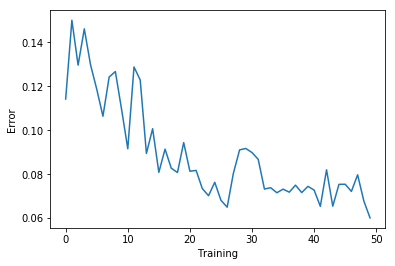

In [30]:
#Plot the accuracy chart
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()

In [31]:
#Validate
layer0 = X_test
layer1 = sigmoid(np.dot(layer0, w[0]))
layer2 = sigmoid(np.dot(layer1, w[1]))
layer3 = sigmoid(np.dot(layer2, w[2]))
layer4 = sigmoid(np.dot(layer3, w[3]))

layer4_error = y_test - layer4

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
error = np.mean(np.abs(layer4_error))
accuracy = (1 - error) * 100
print("Validation Accuracy " + str(round(accuracy,2)) + "%")

Validation Accuracy 74.34%


In [36]:
layer4

array([[0.8220652 , 0.16403359, 0.03315455, 0.00771123],
       [0.14340634, 0.62612211, 0.19256806, 0.06673634],
       [0.13494118, 0.62377212, 0.16381073, 0.04832509],
       ...,
       [0.1290178 , 0.64209562, 0.15742894, 0.04255261],
       [0.146809  , 0.55955662, 0.27049741, 0.12921104],
       [0.78728546, 0.17776062, 0.04308262, 0.01261583]])

In [39]:
pred = np.array([argmax(i) for i in layer4])

In [74]:
original_values = [argmax(i) for i in y_test]

In [47]:
pred[2]

1

In [86]:
def PrintSamples():
    r, c = 1, 5
    size = 20
    sampled_indexes = np.random.randint(len(X_test),size=5)
                                        
    imgs = X_test[sampled_indexes].reshape(-1,128,128,3) 
                                        
    # Rescale images 0 - 1
    imgs = 0.5 * imgs + 0.5


    fig, axs = plt.subplots(r, c,figsize=(r*size,c*size))
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[j].imshow(imgs[cnt, :,:,0],)
            predicted = classes_map[pred[sampled_indexes[cnt]]]
            original = classes_map[original_values[sampled_indexes[cnt]]]
            axs[j].set_title("Predicted: %s Class: %s" % (predicted, original))
            axs[j].axis('off')
            cnt += 1
    #fig.savefig("images/%d.png" % epoch)
    plt.show()
    plt.close()

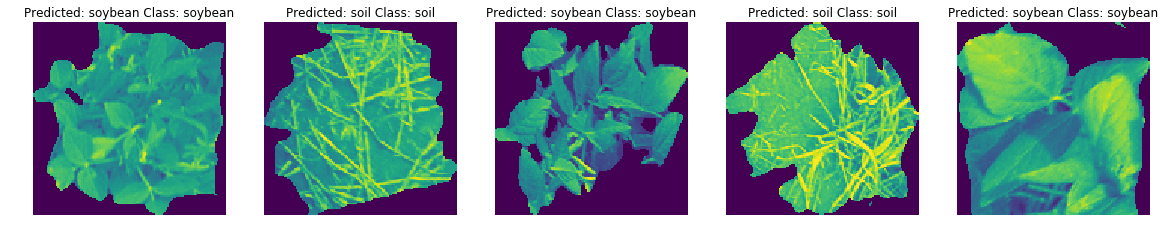

In [87]:
PrintSamples()